In [ ]:
import time, csv, os
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 공통 경로
base_dir = r"C:\Users\hyeon\Desktop\ai05-level1-project"
combined_dataset_dir = os.path.join(base_dir, "CombinedDataset")
yaml_path_combined = os.path.join(combined_dataset_dir, 'data_70_15_15_split.yaml')
exp_dir = os.path.join(base_dir, "Exp")
class_to_id_path = os.path.join(base_dir, "class_to_id.json")
yaml_path = yaml_path_combined

# 실험 목록 (원하는 만큼)
experiments = [
    {"name": "yolov8n_mosaic10", "mosaic": 1.0},
    {"name": "yolov8n_mosaic05", "mosaic": 0.5},
    {"name": "yolov8n_mosaic00", "mosaic": 0.0}
]

summary = []  # 전체 요약 저장용

for exp in experiments:
    name = exp["name"]
    mosaic = exp["mosaic"]

    class EpochTimer:
        def __init__(self):
            self.start = None
            self.times = []
        def on_train_epoch_start(self, trainer):
            self.start = time.time()
        def on_train_epoch_end(self, trainer):
            if self.start is None: return
            t = time.time() - self.start
            self.times.append(t)
            print(f"⏱ {name} | Epoch {trainer.epoch+1}: {t:.2f}s")

    timer = EpochTimer()
    model = YOLO("yolov8n.pt")
    model.add_callback("on_train_epoch_start", timer.on_train_epoch_start)
    model.add_callback("on_train_epoch_end",   timer.on_train_epoch_end)

    start = time.time()
    results = model.train(
        data=yaml_path,
        epochs=70,
        imgsz=640,
        batch=16,
        device=0,
        project=exp_dir,
        name=name,
        optimizer="AdamW",
        lr0=0.001,
        workers=0,
        mosaic=mosaic
    )
    total_min = (time.time() - start) / 60
    summary.append({"experiment": name, "total_min": round(total_min, 2)})

    # --- 실험별 개별 CSV 저장 ---
    csv_path = os.path.join(exp_dir, f"{name}_epoch_times.csv")
    with open(csv_path, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["epoch", "time_sec"])
        for i, t in enumerate(timer.times, start=1):
            writer.writerow([i, round(t, 2)])
    print(f"✅ {name} epoch별 시간 기록 저장 완료: {csv_path}")

# --- 전체 요약 저장 ---
summary_path = os.path.join(exp_dir, "all_experiments_time_summary.csv")
pd.DataFrame(summary).to_csv(summary_path, index=False)
print(f"📊 전체 실험 요약 저장 완료: {summary_path}")


New https://pypi.org/project/ultralytics/8.3.223 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.221  Python-3.11.14 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\hyeon\Desktop\ai05-level1-project\CombinedDataset\data_70_15_15_split.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.9

c:\Users\hyeon\anaconda3\envs\codeit_project_env\Lib\site-packages\ultralytics\utils\metrics.py:582: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
c:\Users\hyeon\anaconda3\envs\codeit_project_env\Lib\site-packages\ultralytics\utils\metrics.py:582: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
c:\Users\hyeon\anaconda3\envs\codeit_project_env\Lib\site-packages\ultralytics\utils\metrics.py:582: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
c:\Users\hyeon\anaconda3\envs\codeit_project_env\Lib\site-packages\ultralytics\utils\metrics.py:582: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
c:\Users\hyeon\anaconda3\envs\codeit_project_env\Lib\site-packages\ultralytics\utils\metrics.py:582: UserWarning: G

                   all        221        839      0.984      0.977      0.994      0.992
             5mg         20         20      0.996          1      0.995      0.995
          800mg         29         29      0.996          1      0.995      0.991
          500/20mg         17         18      0.994          1      0.995      0.995
                            9          9      0.988          1      0.995      0.995
            100mg         16         16      0.994          1      0.995      0.986
         30mg         11         11      0.992          1      0.995      0.995
          ()         17         17          1       0.99      0.995      0.995
                      10         10       0.99          1      0.995      0.995
          500/20mg         16         16      0.993          1      0.995      0.995
                           12         12      0.992          1      0.995      0.995
              10mg          8          8      0.997          1      0.995      0.99

c:\Users\hyeon\anaconda3\envs\codeit_project_env\Lib\site-packages\ultralytics\utils\metrics.py:582: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
c:\Users\hyeon\anaconda3\envs\codeit_project_env\Lib\site-packages\ultralytics\utils\metrics.py:582: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
c:\Users\hyeon\anaconda3\envs\codeit_project_env\Lib\site-packages\ultralytics\utils\metrics.py:582: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
c:\Users\hyeon\anaconda3\envs\codeit_project_env\Lib\site-packages\ultralytics\utils\metrics.py:582: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
c:\Users\hyeon\anaconda3\envs\codeit_project_env\Lib\site-packages\ultralytics\utils\metrics.py:582: UserWarning: G

                   all        221        839      0.987      0.974      0.994      0.993
             5mg         20         20      0.999          1      0.995      0.978
          800mg         29         29      0.999          1      0.995      0.995
          500/20mg         17         18      0.996          1      0.995      0.995
                            9          9      0.991          1      0.995      0.995
            100mg         16         16          1      0.974      0.995      0.995
         30mg         11         11      0.992          1      0.995       0.98
          ()         17         17      0.944      0.984      0.992      0.992
                      10         10      0.991          1      0.995      0.995
          500/20mg         16         16      0.994          1      0.995      0.995
                           12         12      0.993          1      0.995      0.995
              10mg          8          8      0.992          1      0.995      0.99

c:\Users\hyeon\anaconda3\envs\codeit_project_env\Lib\site-packages\ultralytics\utils\metrics.py:582: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
c:\Users\hyeon\anaconda3\envs\codeit_project_env\Lib\site-packages\ultralytics\utils\metrics.py:582: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
c:\Users\hyeon\anaconda3\envs\codeit_project_env\Lib\site-packages\ultralytics\utils\metrics.py:582: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
c:\Users\hyeon\anaconda3\envs\codeit_project_env\Lib\site-packages\ultralytics\utils\metrics.py:582: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
c:\Users\hyeon\anaconda3\envs\codeit_project_env\Lib\site-packages\ultralytics\utils\metrics.py:582: UserWarning: G

                   all        221        839      0.987      0.977      0.994      0.992
             5mg         20         20      0.996          1      0.995      0.995
          800mg         29         29      0.998          1      0.995       0.99
          500/20mg         17         18      0.995          1      0.995      0.995
                            9          9       0.99          1      0.995      0.995
            100mg         16         16      0.994          1      0.995      0.995
         30mg         11         11      0.991          1      0.995      0.995
          ()         17         17      0.939          1      0.992      0.992
                      10         10      0.991          1      0.995      0.979
          500/20mg         16         16      0.994          1      0.995      0.995
                           12         12      0.992          1      0.995      0.995
              10mg          8          8      0.988          1      0.995      0.99

ValueError: 'mosaic=-1' is an invalid value. Valid 'mosaic' values are between 0.0 and 1.0.

In [6]:
%matplotlib inline

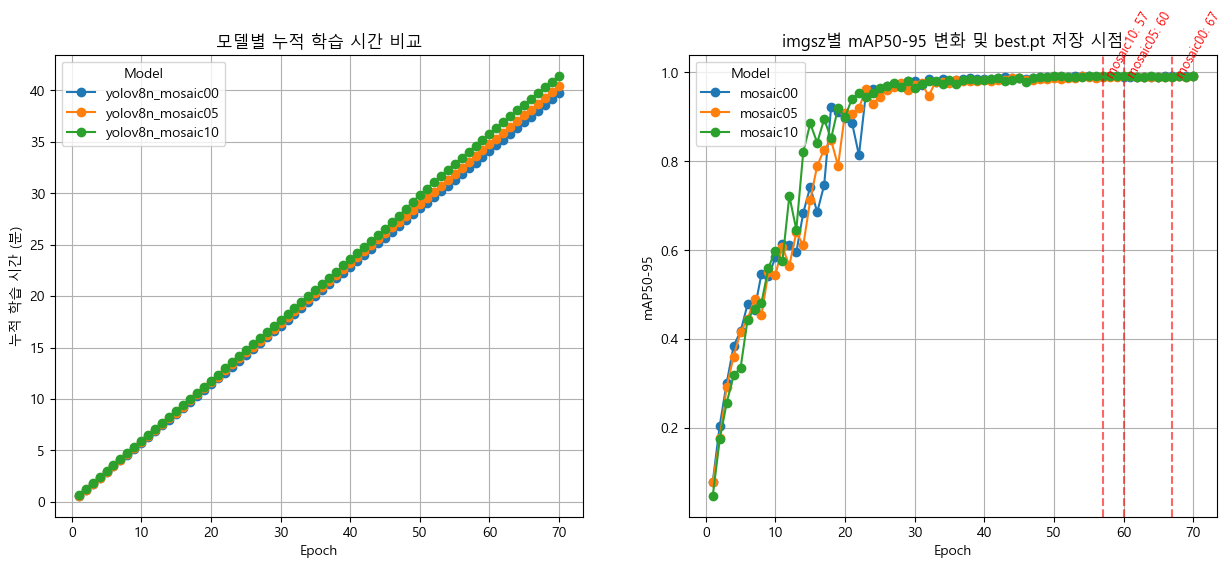

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='Malgun Gothic')	

# -------------------------------------------------------
# 경로 및 실험 목록
# -------------------------------------------------------
base_dir = r"C:\Users\hyeon\Desktop\ai05-level1-project"
combined_dataset_dir = os.path.join(base_dir, "CombinedDataset")
yaml_path_combined = os.path.join(combined_dataset_dir, 'data_70_15_15_split.yaml')
exp_dir = os.path.join(base_dir, "Exp")
class_to_id_path = os.path.join(base_dir, "class_to_id.json")
experiments = [
    "yolov8n_mosaic00",
    "yolov8n_mosaic05",
    "yolov8n_mosaic10"
]

# -------------------------------------------------------
# 그래프 생성
# -------------------------------------------------------
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
for name in experiments:
    csv_path = os.path.join(exp_dir, f"{name}_epoch_times.csv")
    if not os.path.exists(csv_path):
        print(f"⚠️ {name}_epoch_times.csv 없음 → 건너뜀")
        continue

    # CSV 읽기
    df = pd.read_csv(csv_path)

    # epoch별 누적 시간 계산
    df = df.dropna(subset=["epoch"])  # total_time 행 제거
    df["cumulative_sec"] = df["time_sec"].cumsum()
    df["cumulative_min"] = df["cumulative_sec"] / 60

    # 그래프
    plt.plot(df["epoch"], df["cumulative_min"], marker='o', label=name)

plt.title("모델별 누적 학습 시간 비교")
plt.xlabel("Epoch")
plt.ylabel("누적 학습 시간 (분)")
plt.grid(True)
plt.legend(title="Model")

plt.subplot(1, 2, 2)
for name in experiments:
    csv_path = os.path.join(exp_dir, name, "results.csv")
    if not os.path.exists(csv_path):
        print(f"⚠️ {name} results.csv 없음 → 건너뜀")
        continue

    df = pd.read_csv(csv_path)

    # mAP50-95 컬럼 자동 탐색
    col = next((c for c in df.columns if "mAP50-95" in c), None)
    if col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾지 못함.")
        continue

    # 곡선
    plt.plot(df["epoch"], df[col], marker='o', label=f"{name.split('_')[-1]}")

    # best.pt 저장 시점 찾기 (mAP50-95 최대값의 epoch)
    best_idx = df[col].idxmax()
    best_epoch = int(df.loc[best_idx, "epoch"])
    best_val = df.loc[best_idx, col]

    # 세로선 및 주석
    plt.axvline(best_epoch, color='r', linestyle='--', alpha=0.6)
    plt.text(best_epoch + 0.3, best_val - 0.01,
             f"{name.split('_')[-1]}: {best_epoch}",
             rotation=60, color='r', fontsize=9, va='bottom')

plt.title("imgsz별 mAP50-95 변화 및 best.pt 저장 시점")
plt.xlabel("Epoch")
plt.ylabel("mAP50-95")
plt.legend(title="Image Size")
plt.grid(True)
plt.legend(title="Model")
plt.show()


In [13]:
import os
import pandas as pd

exp_dir = os.path.join(base_dir, "Exp")
experiments = [
    "yolov8n_mosaic00",
    "yolov8n_mosaic05",
    "yolov8n_mosaic10"
]

summary = []

for name in experiments:
    result_path = os.path.join(exp_dir, name, "results.csv")
    time_path = os.path.join(exp_dir, f"{name}_epoch_times.csv")

    if not os.path.exists(result_path):
        print(f"⚠️ {name} results.csv 없음 → 건너뜀")
        continue
    if not os.path.exists(time_path):
        print(f"⚠️ {name}_epoch_times.csv 없음 → 총 시간 계산 불가")
        total_time = None
    else:
        time_df = pd.read_csv(time_path)
        total_time = round(time_df["time_sec"].sum(), 2)

    df = pd.read_csv(result_path)

    # mAP50-95 컬럼명 탐색
    map_col = next((c for c in df.columns if "mAP50-95" in c or "metrics/mAP50-95(B)" in c), None)
    if map_col is None:
        print(f"⚠️ {name}: mAP50-95 관련 열을 찾을 수 없음.")
        continue

    best_epoch = int(df.loc[df[map_col].idxmax(), "epoch"])
    best_map = round(df[map_col].max(), 4)

    val_box = round(df.loc[df[map_col].idxmax(), "val/box_loss"], 4)
    val_cls = round(df.loc[df[map_col].idxmax(), "val/cls_loss"], 4)
    val_dfl = round(df.loc[df[map_col].idxmax(), "val/dfl_loss"], 4)
    train_box = round(df.loc[df[map_col].idxmax(), "train/box_loss"], 4)

    summary.append({
        "Model": name,
        "Best Epoch": best_epoch,
        "mAP50-95": best_map,
        "Val Box Loss": val_box,
        "Val Cls Loss": val_cls,
        "Val DFL Loss": val_dfl,
        "Train Box Loss": train_box,
        "Total Time (s)": total_time
    })

# 결과 출력
df_summary = pd.DataFrame(summary)
pd.set_option('display.precision', 4)
print("\n===== 각 모델별 요약 =====")
print(df_summary)

# CSV로 저장
csv_out = os.path.join(exp_dir, "model_summary.csv")
df_summary.to_csv



===== 각 모델별 요약 =====
              Model  Best Epoch  mAP50-95  Val Box Loss  Val Cls Loss  \
0  yolov8n_mosaic00          67    0.9922        0.1411        0.1349   
1  yolov8n_mosaic05          60    0.9926        0.1592        0.1566   
2  yolov8n_mosaic10          57    0.9923        0.1634        0.1737   

   Val DFL Loss  Train Box Loss  Total Time (s)  
0        0.7628          0.1498         2381.70  
1        0.7694          0.2168         2423.21  
2        0.7712          0.2440         2483.95  


<bound method NDFrame.to_csv of               Model  Best Epoch  mAP50-95  Val Box Loss  Val Cls Loss  \
0  yolov8n_mosaic00          67    0.9922        0.1411        0.1349   
1  yolov8n_mosaic05          60    0.9926        0.1592        0.1566   
2  yolov8n_mosaic10          57    0.9923        0.1634        0.1737   

   Val DFL Loss  Train Box Loss  Total Time (s)  
0        0.7628          0.1498         2381.70  
1        0.7694          0.2168         2423.21  
2        0.7712          0.2440         2483.95  >